In [1]:
number = "five"

In [2]:
operator_folder = number + "_operator"

import sys
import os
import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append('utils')
from utility_functions import display_stats, plot_error, write_wavs
from IPython.display import Audio
from plugin_feature_extractor import PluginFeatureExtractor

np.random.seed(8)
sampleRate = 44100
data_folder = "data/overriden/" + operator_folder + "/"
overriden_parameters = np.load(data_folder + "overriden_parameters.npy").tolist()
print len(overriden_parameters)
extractor = PluginFeatureExtractor(midi_note=24, note_length_secs=0.4,
                                   desired_features=[i for i in range(8, 21)],
                                   overriden_parameters=overriden_parameters,
                                   render_length_secs=0.7,
                                   pickle_path="utils/normalisers",
                                   warning_mode="ignore",
                                   normalise_audio=False)
path = "/home/tollie/Development/vsts/dexed/Builds/Linux/build/Dexed.so"
extractor.load_plugin(path)

44
Successfully loaded plugin.


/usr/local/lib/python2.7/dist-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
folder = operator_folder

from IPython.display import Audio

def visualise_prediction(actual_patch, predicted_patch):
    predicted_full_patch = extractor.partial_patch_to_patch(predicted_patch)
    predicted_patch_with_indices = extractor.add_patch_indices(predicted_full_patch)
    if extractor.set_patch(predicted_patch_with_indices):
        audio_predicted = extractor.get_audio_frames()

    actual_full_patch = extractor.partial_patch_to_patch(actual_patch)
    actual_patch_with_indices = extractor.add_patch_indices(actual_full_patch)
    if extractor.set_patch(actual_patch_with_indices):
        audio_actual = extractor.get_audio_frames()

    fig = plt.figure()
    plt.figure(figsize=(14,9))
    plt.subplot(221)
    ax1 = plt.specgram(audio_predicted, NFFT=512, Fs=sampleRate, noverlap=256)
    fig.subplots_adjust(hspace=2, wspace=4)
    # plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.title('predicted spectrogram')

    plt.subplot(222)
    ax2 = plt.plot(audio_predicted)
    fig.subplots_adjust(hspace=2, wspace=4)
    # plt.xlabel('Time (frame count)')
    plt.ylabel('Amplitude')
    plt.title('predicted audio')

    plt.subplot(223)
    ax3 = plt.specgram(audio_actual, NFFT=512, Fs=sampleRate, noverlap=256)
    fig.subplots_adjust(hspace=2, wspace=4)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.title('actual spectrogram')

    plt.subplot(224)
    ax4 = plt.plot(audio_actual)
    fig.subplots_adjust(hspace=2, wspace=4)
    plt.xlabel('Time (frame count)')
    plt.ylabel('Amplitude')
    plt.title('actual audio')
    plt.show()

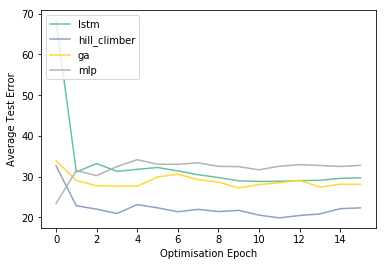

In [4]:
all_models_error = pickle.load(open("stats/" + folder + "/all_models_error.p", "rb")).items()

# try:
#     all_ga_error = pickle.load(open("stats/" + folder + "/ga_models_error.p", "rb")).items()
#     all_models_error.extend(all_ga_error)
# except:
#     pass

try:
    all_hills_error = pickle.load(open("stats/" + folder + "/all_hills_error.p", "rb")).items()
    all_models_error.extend(all_hills_error)
except:
    pass

# Based on: http://stackoverflow.com/a/35971096/5398272
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for i in range(len(all_models_error)):
    (label, error) = all_models_error[i]
    if len(error) > 0:
        ax1.plot(error, label=label)

colormap = plt.cm.Set2
colors = [colormap(i) for i in np.linspace(0, 1, len(ax1.lines))]
for i, j in enumerate(ax1.lines):
    j.set_color(colors[i])
ax1.legend(loc=2)
plt.xlabel('Optimisation Epoch')
plt.ylabel('Average Test Error')
plt.show()

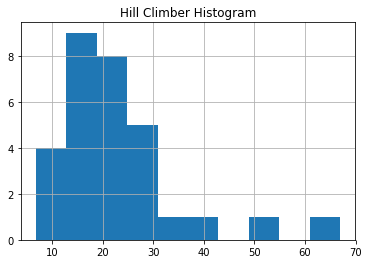

In [5]:
# stats == tuple(average_error, best_pairs, all_errors)
import pandas as pd

hill = pickle.load(open("stats/" + folder + "/hill_climber.p"))

hill_best_pairs = hill[1]
hill_all_errors = hill[2]

count, division1 = np.histogram(hill_all_errors)
series = pd.Series(np.array(hill_all_errors)).hist(bins=division1)
plt.title('Hill Climber Histogram')

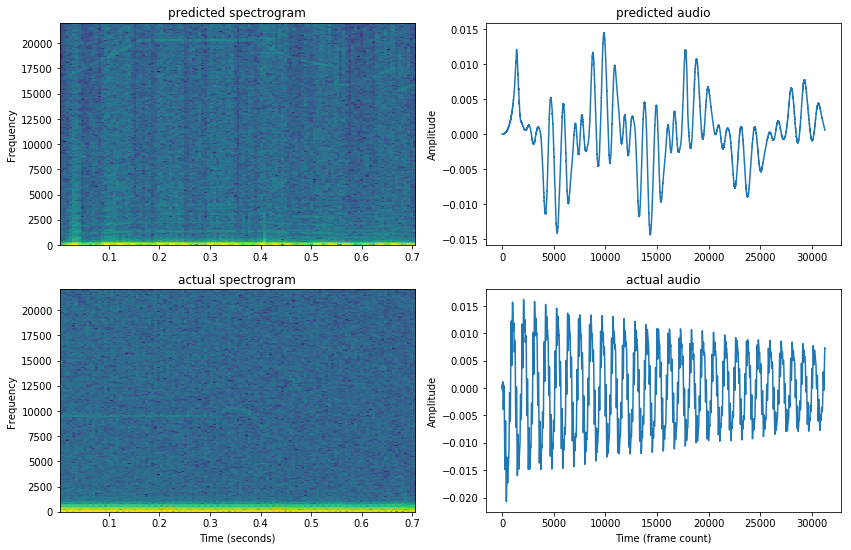

In [6]:
visualise_prediction(hill_best_pairs['actual_patch'], hill_best_pairs['predicted_patch'])

In [7]:
def audio(predicted_patch):
    predicted_full_patch = extractor.partial_patch_to_patch(predicted_patch)
    predicted_patch_with_indices = extractor.add_patch_indices(predicted_full_patch)
    if extractor.set_patch(predicted_patch_with_indices):
        return extractor.get_audio_frames()

Audio(audio(hill_best_pairs['predicted_patch']), rate=44100)

In [8]:
Audio(audio(hill_best_pairs['actual_patch']), rate=44100)

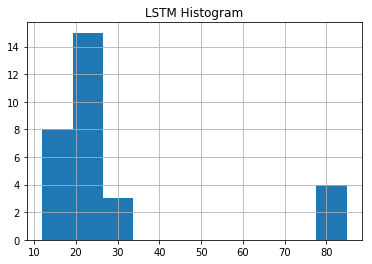

In [9]:
# stats == tuple(average_error, best_pairs, all_errors)
import pandas as pd

lstm = pickle.load(open("stats/" + folder + "/lstm.p"))

lstm_best_pairs = lstm[1]
lstm_all_errors = lstm[2]

count, division1 = np.histogram(lstm_all_errors)
series = pd.Series(np.array(lstm_all_errors)).hist(bins=division1)
plt.title('LSTM Histogram')

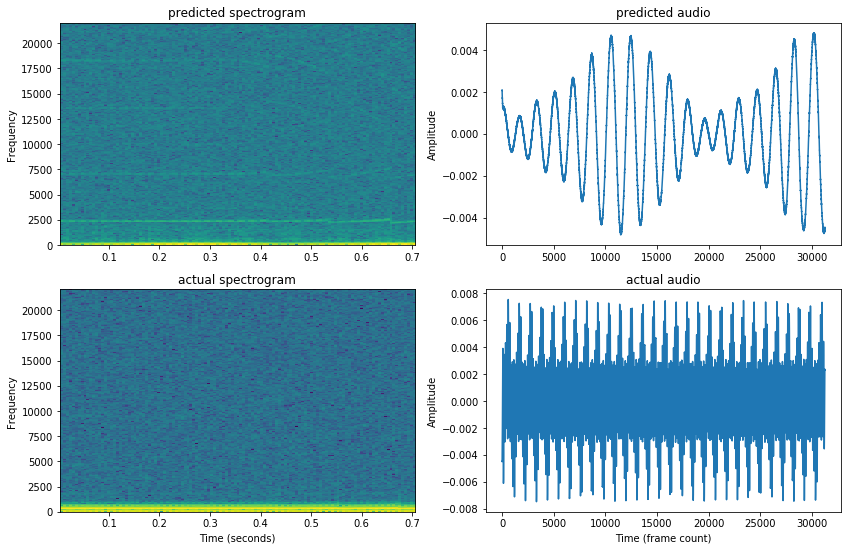

In [13]:
visualise_prediction(lstm_best_pairs['actual_patch'], lstm_best_pairs['predicted_patch'])

In [14]:
Audio(audio(lstm_best_pairs['predicted_patch']), rate=44100)

In [15]:
Audio(audio(lstm_best_pairs['actual_patch']), rate=44100)

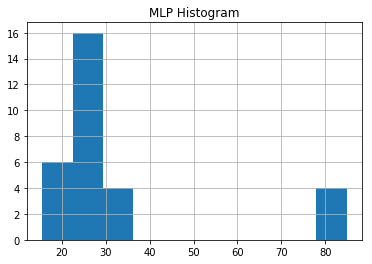

In [16]:
# stats == tuple(average_error, best_pairs, all_errors)
import pandas as pd

mlp = pickle.load(open("stats/" + folder + "/mlp.p"))

mlp_best_pairs = mlp[1]
mlp_all_errors = mlp[2]

count, division1 = np.histogram(mlp_all_errors)
series = pd.Series(np.array(mlp_all_errors)).hist(bins=division1)
plt.title('MLP Histogram')

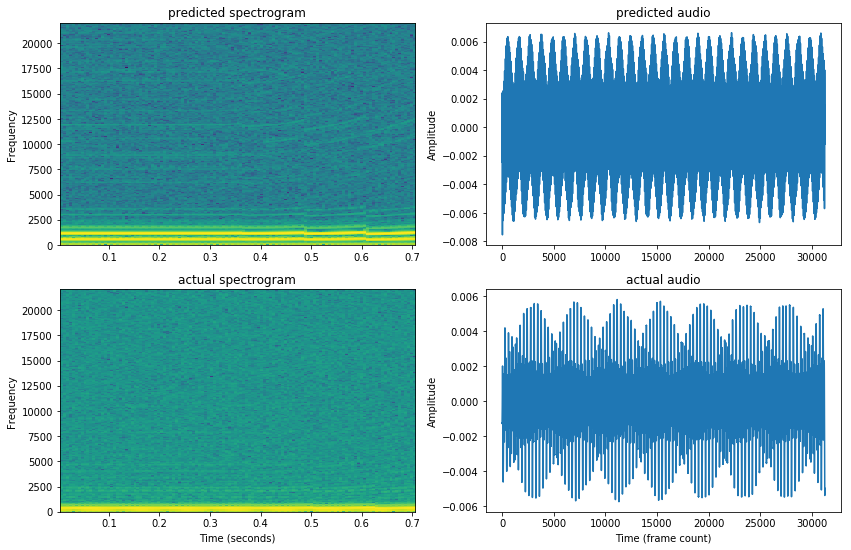

In [17]:
visualise_prediction(mlp_best_pairs['actual_patch'], mlp_best_pairs['predicted_patch'])

In [18]:
Audio(audio(mlp_best_pairs['predicted_patch']), rate=44100)

In [19]:
Audio(audio(mlp_best_pairs['actual_patch']), rate=44100)

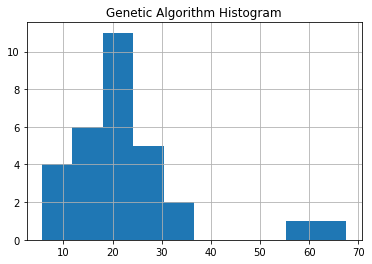

In [17]:
# stats == tuple(average_error, best_pairs, all_errors)
import pandas as pd

ga = pickle.load(open("stats/" + folder + "/ga.p"))

ga_best_pairs = ga[1]
ga_all_errors = ga[2]

count, division1 = np.histogram(ga_all_errors)
series = pd.Series(np.array(ga_all_errors)).hist(bins=division1)
plt.title('Genetic Algorithm Histogram')

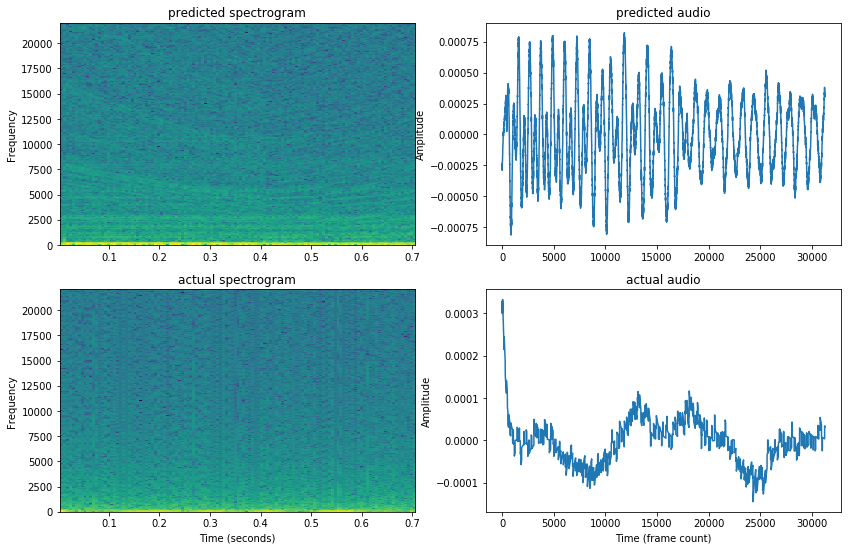

In [18]:
visualise_prediction(ga_best_pairs['actual_patch'], ga_best_pairs['predicted_patch'])

In [19]:
Audio(audio(ga_best_pairs['predicted_patch']), rate=44100)

In [20]:
Audio(audio(ga_best_pairs['actual_patch']), rate=44100)